In [1]:
# SOLUTION:

# Solution for correcting data quality issues
# Debug data first!

# In this dataset, we have lot of observations that have missing values
# Missing values are represented using 0s
# We need to impute values; one option is to find out mean for every class and use that as a substitute 
# for missing values
# With these changes,the model F1 score improves from 0.65 to 0.81

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Diabetes Binary Classification Dataset</h2>

Input Features:
'preg_count', 'glucose_concentration', 'diastolic_bp', 'triceps_skin_fold_thickness', two_hr_serum_insulin', 'bmi', 'diabetes_pedi', 'age' <br>

Target Feature: 
'diabetes_class'<br>

Objective: Predict diabetes_class for given input features<br>

<h4>Data Source: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes </h4>

In [2]:
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

In [3]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [4]:
# Look for any columns that have NA
df.isna().any(axis=0)

preg_count                     False
glucose_concentration          False
diastolic_bp                   False
triceps_skin_fold_thickness    False
two_hr_serum_insulin           False
bmi                            False
diabetes_pedi                  False
age                            False
diabetes_class                 False
dtype: bool

In [5]:
df.describe()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


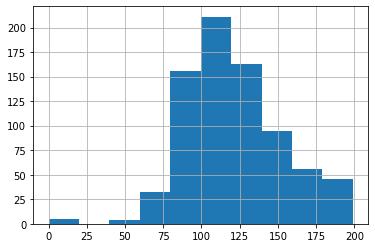

In [6]:
df['glucose_concentration'].hist()
plt.show()

In [7]:
# Find Summary Statistics for Each Class
# Impute values based on class
# https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
group_class = df.groupby('diabetes_class')

In [8]:
# First few rows of each group
group_class.head(2)

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [9]:
# Attribute Mean value is different for each group
group_class.mean()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
diabetes_class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
df['diabetes_class'].value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

In [11]:
# For each group, use group level averages to fill missing values
df['glucose_concentration'] = group_class['glucose_concentration'].transform(lambda x: x.replace(0,x.mean()))
df['diastolic_bp'] = group_class['diastolic_bp'].transform(lambda x: x.replace(0,x.mean()))
df['triceps_skin_fold_thickness'] = group_class['triceps_skin_fold_thickness'].transform(lambda x: x.replace(0,x.mean()))
df['two_hr_serum_insulin'] = group_class['two_hr_serum_insulin'].transform(lambda x: x.replace(0,x.mean()))
df['bmi'] = group_class['bmi'].transform(lambda x: x.replace(0,x.mean()))
df['diabetes_pedi'] = group_class['diabetes_pedi'].transform(lambda x: x.replace(0,x.mean()))
df['age'] = group_class['age'].transform(lambda x: x.replace(0,x.mean()))

In [12]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [13]:
# Separate diabetic and normal samples
diabetic = df.diabetes_class == 1
normal = df.diabetes_class == 0

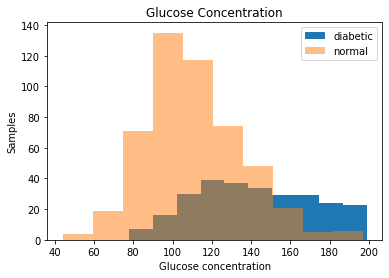

In [14]:
# Glucose concentration histogram
plt.hist(df[diabetic].glucose_concentration,label='diabetic')
plt.hist(df[normal].glucose_concentration,alpha=0.5,label='normal')
plt.title('Glucose Concentration')
plt.xlabel('Glucose concentration')
plt.ylabel('Samples')
plt.legend()
plt.show()

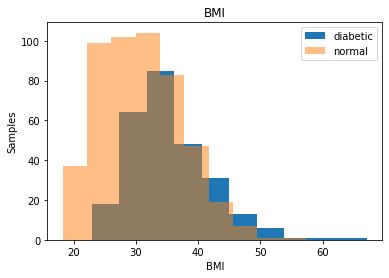

In [15]:
# BMI histogram
plt.hist(df[diabetic].bmi,label='diabetic')
plt.hist(df[normal].bmi,alpha=0.5,label='normal')
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Samples')
plt.legend()
plt.show()

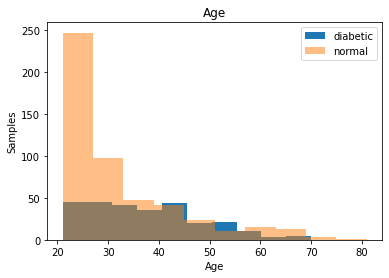

In [16]:
# Age
plt.hist(df[diabetic].age,label='diabetic')
plt.hist(df[normal].age,alpha=0.5,label='normal')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Samples')
plt.legend()
plt.show()

## Training and Validation Set
### Target Variable as first column followed by input features:
'diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age'
### Training, Validation files do not have a column header

In [17]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [18]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows - train

In [19]:
rows, train, test

(768, 537, 231)

In [20]:
# Write Training Set
df[:train].to_csv('diabetes_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [21]:
# Write Validation Set
df[train:].to_csv('diabetes_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [22]:
# Write Column List
with open('diabetes_train_column_list.txt','w') as f:
    f.write(','.join(columns))